### Excercici 3

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('new_akumenius2.csv')
df['date']= pd.to_datetime(df['date'])
df.bot=='True'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246913 entries, 0 to 246912
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   IP                 246913 non-null  object        
 1   date               246913 non-null  datetime64[ns]
 2   ip_city            246587 non-null  object        
 3   ip_loc             246913 non-null  object        
 4   ip_country         246587 non-null  object        
 5   URL                246913 non-null  object        
 6   log                246913 non-null  object        
 7   bot                246913 non-null  bool          
 8   device_brand       137631 non-null  object        
 9   device_model       137503 non-null  object        
 10  os_family          246913 non-null  object        
 11  user_agent_family  246913 non-null  object        
dtypes: bool(1), datetime64[ns](1), object(10)
memory usage: 21.0+ MB


##### Afegir nous IPs que són bots 

In [3]:
words = [ 'bot', 'baidu', 'crawl']
df['bot'] = df['log'].apply(lambda x: True if any(s in x for s in words) else False)
df['bot'].describe()

count     246913
unique         2
top        False
freq      168007
Name: bot, dtype: object

In [4]:
df

,IP,date,ip_city,ip_loc,ip_country,URL,log,bot,device_brand,device_model,os_family,user_agent_family
0,66.249.76.216,2014-02-23 03:10:31,London,"51.5085,-0.1257",GB,hoteles-baratos/ofertas-hotel-Club-&-Hotel-Let...,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,True,Spider,Desktop,Other,Googlebot
1,66.249.76.216,2014-02-23 03:10:33,London,"51.5085,-0.1257",GB,hoteles-baratos/ofertas-hotel-Metropolis-Hotel...,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,True,Spider,Desktop,Other,Googlebot
2,66.249.76.216,2014-02-23 03:10:35,London,"51.5085,-0.1257",GB,hoteles-baratos/ofertas-hotel-Faena-Hotel-Buen...,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,True,Spider,Desktop,Other,Googlebot
3,66.249.76.216,2014-02-23 03:10:38,London,"51.5085,-0.1257",GB,hoteles-baratos/ofertas-hotel-Kensington-Townh...,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,True,Spider,Desktop,Other,Googlebot
4,66.249.76.216,2014-02-23 03:10:39,London,"51.5085,-0.1257",GB,destinos-baratos/destinosEstrelles/hoteles-en-...,Mozilla/5.0 (compatible; Googlebot/2.1; +http:...,True,Spider,Desktop,Other,Googlebot
...,...,...,...,...,...,...,...,...,...,...,...,...
246908,5.255.253.53,2014-03-02 03:05:35,Moscow,"55.7522,37.6156",RU,HTTP/1.1,Mozilla/5.0 (compatible; YandexBot/3.0; +http:...,True,Spider,Desktop,Other,YandexBot
246909,5.255.253.53,2014-03-02 03:05:34,Moscow,"55.7522,37.6156",RU,HTTP/1.1,Mozilla/5.0 (compatible; YandexBot/3.0; +http:...,True,Spider,Desktop,Other,YandexBot
246910,5.255.253.53,2014-03-02 03:05:35,Moscow,"55.7522,37.6156",RU,HTTP/1.1,Mozilla/5.0 (compatible; YandexBot/3.0; +http:...,True,Spider,Desktop,Other,YandexBot
246911,5.255.253.53,2014-03-02 03:05:39,Moscow,"55.7522,37.6156",RU,HTTP/1.1,Mozilla/5.0 (compatible; YandexBot/3.0; +http:...,True,Spider,Desktop,Other,YandexBot


In [5]:
tr=df.bot[df.bot==True].count()
fls=df.bot[df.bot==False].count()
print('number of obvious bot clicks: ',tr,'\n''number of clicks from no bots: ',fls,
     '\n''precentage of traffic from bots: ',(tr/(tr+fls))*100,'%')

number of obvious bot clicks:  78906 
number of clicks from no bots:  168007 
precentage of traffic from bots:  31.957005098961982 %


In [6]:
df['bot'].describe()

count     246913
unique         2
top        False
freq      168007
Name: bot, dtype: object

def crawl(df):
    if 'baidu' in df['log']:
        return True
    if 'crawl' in df['log']:
        return True
    if 'bot' in df['log']:
        return True
    else:
        return False
    
df['bot'] = df.apply(crawl, axis=1)

##### Gràfic de proporció de vistes de bots "obvis" vs. altres visites

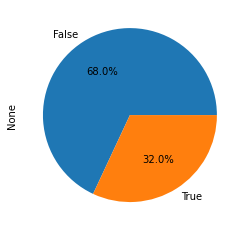

In [7]:
df.groupby(['bot']).size().plot.pie(autopct='%1.1f%%')

##### Una nova BD sense els bots

In [8]:
df_nobot=df[df['bot'] == False]
df_nobot.head(10)
#df_nobot.insert(7,'bot1','')

,IP,date,ip_city,ip_loc,ip_country,URL,log,bot,device_brand,device_model,os_family,user_agent_family
22,193.111.141.116,2014-02-23 03:11:07,NaN,"0.0000,0.0000",NaN,hoteles-baratos/ofertas-hotel-Roque-Monica-Apa...,Mozilla/5.0 (X11; Linux i686; rv:6.0) Gecko/20...,False,NaN,NaN,Linux,Firefox
242,217.12.28.5,2014-02-23 03:16:36,Sevilla,"37.3828,-5.9732",ES,libraries/anythingSlider/anythingSlider.css HT...,Mozilla/4.0 (compatible;),False,NaN,NaN,Other,Other
249,217.12.28.5,2014-02-23 03:16:49,Sevilla,"37.3828,-5.9732",ES,libraries/anythingSlider/images/5a.png HTTP/1.1,Mozilla/4.0 (compatible;),False,NaN,NaN,Other,Other
333,199.30.20.223,2014-02-23 03:18:48,Boydton,"36.6676,-78.3875",US,hoteles-baratos/ofertas-hotel-Playa-Blanca-All...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,False,Spider,Desktop,Windows,BingPreview
335,199.30.20.223,2014-02-23 03:18:51,Boydton,"36.6676,-78.3875",US,includes/css/style.css HTTP/1.1,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,False,Spider,Desktop,Windows,BingPreview
336,199.30.20.223,2014-02-23 03:18:51,Boydton,"36.6676,-78.3875",US,modules/raton/views/themes/bcoos/css/buttons_n...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,False,Spider,Desktop,Windows,BingPreview
337,199.30.20.223,2014-02-23 03:18:51,Boydton,"36.6676,-78.3875",US,modules/raton/views/themes/bcoos/css/2column_h...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,False,Spider,Desktop,Windows,BingPreview
339,199.30.20.223,2014-02-23 03:18:51,Boydton,"36.6676,-78.3875",US,modules/raton/views/themes/bcoos/css/raton.css...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,False,Spider,Desktop,Windows,BingPreview
340,199.30.20.223,2014-02-23 03:18:51,Boydton,"36.6676,-78.3875",US,libraries/jqueryui/css/ui-lightness/jquery-ui....,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,False,Spider,Desktop,Windows,BingPreview
450,217.12.28.5,2014-02-23 03:21:44,Sevilla,"37.3828,-5.9732",ES,modules/raton/views/themes/bcoos/images/buscad...,Mozilla/4.0 (compatible;),False,NaN,NaN,Other,Other


In [9]:
df_topips = df_nobot.IP.value_counts().rename_axis('IP').reset_index(name='counts').head(5)
df_topips

,IP,counts
0,80.28.221.123,14725
1,217.125.71.222,5201
2,62.117.197.230,2567
3,89.128.176.162,1093
4,80.58.250.94,1043


##### Preparar les dades per poder fer la gràfica que destaqui les IPs amb més visites

In [10]:
df_ips=df_nobot.set_index('date').groupby([pd.Grouper(freq='D'), 'IP'])['IP'].count().unstack(level=1)
df_ips.reset_index(inplace=True)
df_ips.set_index("date", inplace = True)

In [11]:
df_ips

IP,101.199.108.59,101.226.167.226,107.178.37.48,107.178.38.221,107.21.14.116,107.6.95.11,107.6.95.122,107.6.95.13,107.6.95.16,107.6.95.20,...,95.62.55.142,95.62.63.204,95.63.1.210,95.63.165.105,95.63.2.45,95.63.234.126,95.63.60.249,96.242.31.129,98.137.206.41,98.244.10.248
date,,,,,,,,,,,,,,,,,,,,,
2014-02-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-02-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,NaN,NaN,NaN,176.0,NaN,NaN,NaN,NaN,91.0
2014-02-25,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,5.0,1.0,NaN,NaN,NaN,NaN,154.0,NaN,11.0,NaN
2014-02-26,32.0,NaN,NaN,NaN,NaN,1.0,2.0,1.0,2.0,1.0,...,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-02-27,NaN,NaN,NaN,176.0,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,NaN,110.0,NaN,NaN,265.0,NaN,NaN,NaN,NaN
2014-02-28,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,28.0,NaN,NaN,NaN,NaN,NaN,52.0,NaN,NaN
2014-03-01,NaN,NaN,194.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,69.0,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Crear una gràfica der detectar si els IPs amb mes visites (segurament un bots "d'incògnit") destaquen molt en comparació a les possibles visites d'usuaris

In [12]:
topip = df_topips['IP'].tolist()
#destacar amb color solament els top 5 IPs
import random
get_colors = lambda n: list(map(lambda i: "#" + "%06x" % random.randint(0xcc0033, 0xff0066),range(n)))
colors=get_colors(5)

dic_ip = {topip[i]: colors[i] for i in range(len(topip))}
dic_ip

{'80.28.221.123': '#ef8b8f',
 '217.125.71.222': '#e98f92',
 '62.117.197.230': '#ef3924',
 '89.128.176.162': '#fb95a9',
 '80.58.250.94': '#f278bf'}

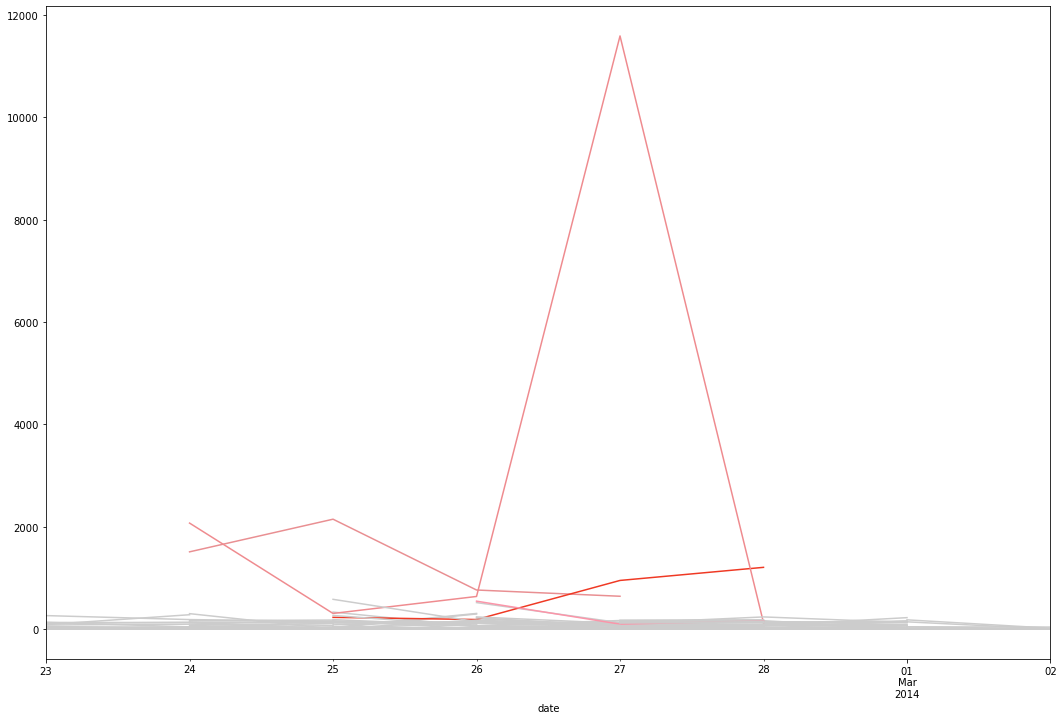

In [13]:
# use get to specify dark gray as the default color.
df_ips.plot(legend=False,figsize=(18, 12),color=[dic_ip.get(x, '#cccccc') for x in df_ips.columns])

##### Eliminar les columnes de les IPs amb un nombre ´massa´elevat de visites. Segurament un bot "d'incògnit"

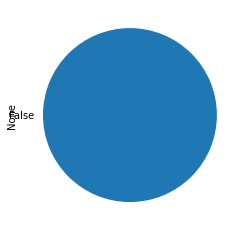

In [14]:
df_nobot = df_nobot[~df_nobot['IP'].isin(topip)]
df_nobot.groupby(['bot']).size().plot.pie()

In [15]:
df_nobot.ip_city.value_counts().rename_axis('city').reset_index(name='counts').head(15)

,city,counts
0,Madrid,34159
1,Barcelona,11318
2,Sevilla,5452
3,Valencia,4756
4,Zaragoza,3789
5,Málaga,2515
6,Palma,2363
7,Granada,1970
8,Cadiz,1602
9,Las Palmas de Gran Canaria,1588


In [16]:
df_nobot.ip_country.value_counts().rename_axis('country').reset_index(name='counts').head(15)

,country,counts
0,ES,123915
1,US,6243
2,DE,1480
3,MX,1205
4,BR,1105
5,IT,1044
6,AR,1007
7,GB,609
8,FR,572
9,CO,564


In [17]:
import re
#df_nobot[df_nobot['URL'].str.contains("POST /")].count()
df_nobot['URL'] = df_nobot['URL'].str.replace('POST /', '')
df_nobot['URL'] = df_nobot['URL'].str.replace('POST/', '')
                           

In [18]:
# regex to find before first / : x = re.findall("^(.+?)/", txt)
df_nobot['new_url']=df_nobot['URL'].str.extract('^(.+?)/')

In [19]:
df_nobot['new_url'].unique()

array(['hoteles-baratos', 'libraries', 'includes', 'modules', ' HTTP',
       'about HTTP', 'contacto HTTP', 'login-register-home HTTP',
       'chollos HTTP', 'hoteles-de-nieve-con-forfait HTTP',
       'destinos-baratos', 'legal-notice HTTP', 'escapadas',
       'robots.txt HTTP', 'HNAP1', '/libraries', '/modules',
       'destinosCaracteristicas', 'HEAD ', 'escapadas HTTP',
       'icon.png HTTP', 'agencias_europlayas', 'hotel-list',
       'destinosEstrelles', 'escapadas-mas-informacion HTTP',
       'destinos-get HTTP', 'destinos-insert HTTP', 'raton-search HTTP',
       'hotel-list?type=e HTTP', 'hotel-list-data', 'hotel-list HTTP',
       'destinos-caracteristicas', 'hotel-list?type=1 HTTP',
       'hotelDetailPopup', 'reserve-save2 HTTP', 'booking',
       'reserve-submit2 HTTP', 'reserve-submit', 'reserve-confirm',
       'payment-confirm HTTP', 'verify-payment HTTP', 'reserve-confirm2',
       nan, 'favicon.ico HTTP', 'w00tw00t.at.ISC.SANS.DFind:) HTTP',
       'hotel-list-da

In [20]:
df_nobot

,IP,date,ip_city,ip_loc,ip_country,URL,log,bot,device_brand,device_model,os_family,user_agent_family,new_url
22,193.111.141.116,2014-02-23 03:11:07,NaN,"0.0000,0.0000",NaN,hoteles-baratos/ofertas-hotel-Roque-Monica-Apa...,Mozilla/5.0 (X11; Linux i686; rv:6.0) Gecko/20...,False,NaN,NaN,Linux,Firefox,hoteles-baratos
242,217.12.28.5,2014-02-23 03:16:36,Sevilla,"37.3828,-5.9732",ES,libraries/anythingSlider/anythingSlider.css HT...,Mozilla/4.0 (compatible;),False,NaN,NaN,Other,Other,libraries
249,217.12.28.5,2014-02-23 03:16:49,Sevilla,"37.3828,-5.9732",ES,libraries/anythingSlider/images/5a.png HTTP/1.1,Mozilla/4.0 (compatible;),False,NaN,NaN,Other,Other,libraries
333,199.30.20.223,2014-02-23 03:18:48,Boydton,"36.6676,-78.3875",US,hoteles-baratos/ofertas-hotel-Playa-Blanca-All...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,False,Spider,Desktop,Windows,BingPreview,hoteles-baratos
335,199.30.20.223,2014-02-23 03:18:51,Boydton,"36.6676,-78.3875",US,includes/css/style.css HTTP/1.1,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,False,Spider,Desktop,Windows,BingPreview,includes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
246879,83.45.25.198,2014-03-02 02:48:14,Fuengirola,"36.5400,-4.6247",ES,chollos HTTP/1.1,Mozilla/5.0 (Windows NT 6.3; WOW64; rv:27.0) G...,False,NaN,NaN,Windows,Firefox,chollos HTTP
246880,83.45.25.198,2014-03-02 02:48:14,Fuengirola,"36.5400,-4.6247",ES,favicon.ico HTTP/1.1,Mozilla/5.0 (Windows NT 6.3; WOW64; rv:27.0) G...,False,NaN,NaN,Windows,Firefox,favicon.ico HTTP
246881,83.45.25.198,2014-03-02 02:48:14,Fuengirola,"36.5400,-4.6247",ES,escapadas HTTP/1.1,Mozilla/5.0 (Windows NT 6.3; WOW64; rv:27.0) G...,False,NaN,NaN,Windows,Firefox,escapadas HTTP
246882,83.45.25.198,2014-03-02 02:48:15,Fuengirola,"36.5400,-4.6247",ES,favicon.ico HTTP/1.1,Mozilla/5.0 (Windows NT 6.3; WOW64; rv:27.0) G...,False,NaN,NaN,Windows,Firefox,favicon.ico HTTP


##### Comprovar les visites procedents de Google Ads. Vist que n´hi havia a la columna new_url una vegada feta la neteja per veure la secció visitada

In [22]:
gclid=df_nobot.URL.str.count("gclid").sum()
rows=len(df_nobot.index)
percentage=gclid/rows
print('número de clickxs: ', rows, 
      '\n''núumero de clicks des de google ads: ', gclid,
      '\n''percentatge de clicks des de google ads:',"{:.4f}".format(percentage),'%')

número de clickxs:  143378 
núumero de clicks des de google ads:  483 
percentatge de clicks des de google ads: 0.0034 %


##### Creació de taula per poder representar els nombres de visites des de cada població

In [23]:
import numpy as np
#df_nobot.groupby(['ip_city', 'ip_country','ip_loc']).agg({'ip_city': 'value_counts'})
df_map=df_nobot.groupby(['ip_loc']).ip_city.agg(['value_counts']).reset_index()
df_map

,ip_loc,ip_city,value_counts
0,"-0.2298,-78.5250",Quito,134
1,"-0.9621,-80.7127",Manta,69
2,"-1.0286,-79.4635",Quevedo,80
3,"-1.4558,-48.5044",Belém,2
4,"-10.7500,-77.7667",Barranca,1
...,...,...,...
555,"8.8803,-79.7833",La Chorrera,38
556,"9.3340,-79.8917",Panama City,81
557,"9.6612,-68.5827",San Carlos,34
558,"9.9333,-84.0833",San José,37


##### Separar les coordinades en dues columnes

In [24]:
df_map.insert(3,'lat','')
df_map.insert(4,'lon','')
df_map[['lat','lon']] = df_map.pop('ip_loc').str.split(',', 1, expand=True)


In [25]:
# import the library
import folium
from folium.plugins import MarkerCluster

# Make an empty map
m = folium.Map(location=[20,0], tiles="Stamen Toner", zoom_start=2)

##### Crear un mapa amb agrupació de les ubicacions per no saturar

In [26]:
m = folium.Map(location=[20,0], tiles="Cartodb Positron", zoom_start=2)
folium.TileLayer('cartodbdark_matter').add_to(m)
folium.TileLayer('stamentoner').add_to(m)

marker_cluster = MarkerCluster(
    overlay=False,
    control=False,
    icon_create_function=None    
)

for lat, lng, number, city in zip(df_map['lat'],df_map['lon'],df_map['value_counts'],df_map['ip_city'],):
    location = lat, lng
    marker = folium.Marker(location=location)
    popup = 'city:{}<br>hits:{}'.format(city, number)
    folium.Popup(popup).add_to(marker)
    marker_cluster.add_child(marker)

marker_cluster.add_to(m)
folium.LayerControl().add_to(m);
m